Introdução

Nesta aula iremos gerar e treinar um modelo baseado no algoritmo de Clusterização K-Means para rotulação de dados, sendo os dados um conjunto de notícias da BBC. Contudo, antes de prosseguirmos direto para o código, iremos, mais uma vez, aprofundar-nos acerca dos conceitos que serão vistos ao longo da aula, através de uma breve fundamentação teórica.


Fundamentação Teórica

O problema de clusterização se baseia no agrupamento de objetos de uma base de dados, em que objetos mais similares sejam agrupados em um mesmo cluster e os menos similares sejam agrupados em clusters distintos. É um problema muito estudado e aplicado na mineração de dados e se subdivide em basicamente dois problemas, que são quando sabemos o K número de clusters previamente e quando não o sabemos, sendo este último realizado de forma automática.(OCHI et al., 2004)

Usaremos o Mini Batch K-means, que é uma variação do algoritmos K-means. O K-means é um algoritmo iterativo e rápido, muito utilizado em diversas aplicações. Ele inicia com um centro de cluster de forma aleatório e a cada passo e ele recalcula este ponto de forma a minimizar o error de clusterização.(LIKAS et al., 2003)


Implementação do Código

Antes de começar, precisamos saber quais dados serão usados nesta aula.Iremos nos utilizar de um conjunto de notícias da BBC em inglês, categorizado em 5 tópicos, que são Tecnologia, Esportes, Política, Entretenimento e Negócios. Elas estarão todas juntas em um único arquivo csv (noticias_bbc.csv), e serão colocadas em um data frame para realizarmos a clusterização.


Importando bibliotecas necessárias

In [163]:
import pandas as pd #Para manipular data frames
import numpy as np #Para manipular dados
from sklearn.cluster import MiniBatchKMeans #Biblioteca com o classificador
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF + BoW
from sklearn.decomposition import PCA #Ferramenta para diminuir a dim. de vetor
import matplotlib.pyplot as plt #Para gerar gráficos

In [164]:
#Gerando data frame através do arquivo de noticias
dados = pd.read_csv("noticias_bbc.csv")

Bag-of words e Term Frequency - Inverse Document Frequency (TF-IDF)


Com os dados devidamente alocados no nosso dataframe, vamos agora aplicar uma técnica de pré-processamento de textos necessária para que possamos aplicá-los à um algoritmo classificador, essa técnica é a Bag of Words (BoW).

A bag-of-words é um modelo que estrutura dados não estruturados, geralmente se tornando uma matriz esparsa de valores em que a quantidade de uma palavra é um elemento, sendo muito utilizada na mineração de textos graças a sua simplicidade e ótimo desempenho.(MATSUBARA et al., 2003)

Dessa forma, será formado um vetor em que cada elemento é uma única palavra distinta, sendo este vetor com uma dimensão N, em que N é a quantidade de palavras distintas encontradas em todo o corpo textual de todas as notícias. A partir disso, cada notícia irá se tornar um vetor de tamanho N, em que cada elemento é quantidade daquela palavra na notícia.

Aliado a isso, iremos aplicar o Term-Frequency - Inverse Document Frequency (TF-IDF), que é uma técnica de peso dos termos bastante utilizada na classificação de documentos, onde palavras com poucas ocorrências demonstram ter um significado maior do que as palavras com muitas ocorrências nos textos.

Para isso, utilizaremos uma função disponibilizada pelo Scikit Learn, a TfidfVectorizer. Através dela é possível gerar tanto a BoW como o TF-IDF em simples passos.


In [165]:
#Cria uma instancia do TfidfVectorizer, removendo stop words em inglês
#stop words são palavras não relevantes em significado para o texto
vectorizer = TfidfVectorizer(stop_words="english")
#Molda o modelo com a base de textos usada
vectorizer.fit(dados["texto"].values)
#Transforma os textos do dataframe,estruturando-os em uma BoW e aplica TF-IDF
#armazenando-os em features
features = vectorizer.transform(dados["texto"].values)

Com isto feito, temos nossos dados devidamente tratados e prontos para aplicarmos em um algoritmo de categorização.

Criando e treinando o modelo classificador

Vamos agora criar uma instância do nosso modelo de Clusterização, que é o MiniBatchKMeans.

In [166]:
#Cria um modelo classificador através de MiniBatchKMeans
#n_clusters :  define o numero de clusters do modelo
random_state=129
classificador = MiniBatchKMeans(n_clusters=5,random_state=random_state)

Treinando o modelo Classificador

In [167]:
#Treina o modelo
classificador.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=129,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

A seguir iremos predizer o mesmo conjunto de dados que usamos para treinar o nosso modelo.

In [168]:
#Realiza um teste no modelo, utilizando os dados presentes em features
classificador.predict(features)

array([3, 2, 1, ..., 2, 2, 4])

Com isso, temos os nossos dados categorizados através do nosso modelo de Clusterização. Para vermos o resultado, podemos acessar labels_.

In [169]:
#Retorna o vetor com o resultado do teste aplicado no modelo
classificador.labels_

array([3, 2, 1, ..., 2, 2, 4])

Visualização dos Resultados

Podemos gerar um gráfico para visualizarmos melhor os nossos resultado. Visto que nossas notícias viraram vetores com dimensões muito maiores que 2, iremos utilizar o Principal component analysis (PCA), que será responsável por essa redução de dimensões tanto das notícias como dos vetores que são considerados o centro de cada cluster.

In [170]:
#Cria uma instância de PCA, sendo n_components o numero de componentes
#ou seja, o numero de dimensoes, no nosso caso duas.
pca = PCA(n_components=2, random_state=random_state)

#Armazenamos os novos vetores de dimensoes reduzidas através da transformação
#pelo PCA
features_reduzidos = pca.fit_transform(features.toarray())

#Centro dos Clusters reduzidos à duas dimensões
CC_reduzidos = pca.transform(classificador.cluster_centers_)

Com os dados devidamente transformados/reduzidos para duas dimensões, podemos gerar um gráfico através da biblioteca matplotlib para visualizá-los. No gráfico abaixo, cada ponto representa uma notícia, sendo cada cor uma categoria. Além disso, cada X representa o centro de um cluster.


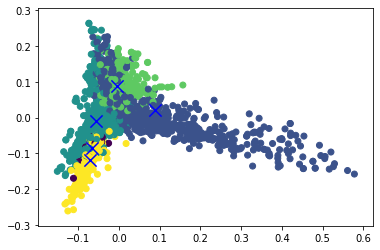

In [171]:
#Plota vários pontos, representando as noticias
plt.scatter(features_reduzidos[:,0], features_reduzidos[:,1], c=classificador.predict(features))
#Plota o centro de cada cluster através de um X
plt.scatter(CC_reduzidos[:,0], CC_reduzidos[:,1], marker='x', s=150, c='b')

Avaliação dos resultados

Com o homogeneity_score podemos comparar os resultados preditos com suas verdadeiras classificações, gerando um valor entre 0 a 1, sendo 1 o valor em que os dados foram preditos corretamente em sua totalidade.


In [172]:
from sklearn.metrics import homogeneity_score
homogeneity_score(dados["categoria"],classificador.predict(features))

0.5750388852174921

Referências

MATSUBARA, Edson Takashi; MARTINS, Claudia Aparecida; MONARD, Maria Carolina. Pretext: Uma ferramenta para pré-processamento de textos utilizando a abordagem bag-of-words. Techinical Report, v. 209, n. 4, 2003.

OCHI, Luiz Satoru; DIAS, Carlos Rodrigo; SOARES, Stênio S. Furtado. Clusterização em mineração de dados. Instituto de Computação-Universidade Federal Fluminense-Niterói, v. 1, p. 46, 2004.

LIKAS, Aristidis; VLASSIS, Nikos; VERBEEK, Jakob J. The global k-means clustering algorithm. Pattern recognition, v. 36, n. 2, p. 451-461, 2003.
